- sklearn转换器、估计器的使用
- sklearn数据标准化与数据划分
- sklearn聚类、分类、回归模型的构建
- sklearn聚类、分类、回归模型的评价

# sklearn转换器处理数据

- 数据的 标准化、二值化、数据集的分割、交叉验证、pca降维
    - model_selection  模型选择模块
    - preprocessing   数据预处理模块
    - decompisition   特征分解模块


## 加载datasets模块中的数据集

- 该模块集成了部分经典数据集

|数据集加载函数|数据集类型|数据集加载函数|数据集类型|
|-|-|-|-|
|load_boston|回归|load_breast_cancer|分类、聚类|
|fetch_california_housing|回归|load_iris|分类、聚类|
|load_digits|分类|load_wine|分类|

In [1]:
from sklearnlearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()##将数据集赋值给iris变量
print('breast_cancer数据集的长度为：',len(cancer))
print('breast_cancer数据集的类型为：',type(cancer))

breast_cancer数据集的长度为： 5
breast_cancer数据集的类型为： <class 'sklearn.utils.Bunch'>


- 数据集的类型可以视为字典
- sklearn的数据集可以使用
    - data ===》 数据
    - target ===》 标签
    - feature_names ===》 特征名称
    - DESCR ===》 描述信息

In [3]:
cancer_data = cancer['data']
print('breast_cancer数据集的数据为：','\n',cancer_data)

breast_cancer数据集的数据为： 
 [[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]


In [4]:
cancer_target = cancer['target'] ## 取出数据集的标签
print('breast_cancer数据集的标签为：\n',cancer_target)

breast_cancer数据集的标签为：
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [5]:
cancer_names = cancer['feature_names'] ## 取出数据集的特征名
print('breast_cancer数据集的特征名为：\n',cancer_names)

breast_cancer数据集的特征名为：
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
cancer_desc = cancer['DESCR'] ## 取出数据集的描述信息
print('breast_cancer数据集的描述信息为：\n',cancer_desc)

breast_cancer数据集的描述信息为：
 Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 i

## 将数据集划分为训练集和测试集

- 在数据分析过程中，为了保证模型在实际系统中能够起到预期作用，一般需要将样本分成独立的3部分：
    - 训练集（trainset）、验证集（validationset）和测试集（testset）。
- 其中，训练集用于估计模型，验证集用于确定网络结构或者控制模型复杂程度的参数，
- 而测试集则用于检验最优模型的性能。
- 典型的划分方式是训练集占总样本的50％，而验证集和测试集各占25％。
    - 当数据总量较少的时候，使用上面的方法将数据划分为3部分就不合适了。
- 常用的方法是留少部分做测试集，然后对其余N个样本采用K折交叉验证法。
    - 其基本步骤是
        - 将样本打乱，
        - 然后均匀分成K份，
        - 轮流选择其中K_1份做训练，剩余的一份做验证，
        - 计算预测误差平方和，
        - 最后把K次的预测误差平方和的均值作为选择最优模型结构的依据。
- sklearn的model_selection模块提供了train_test_split函数，能够对数据集进行拆分，
- sklearn.model_selection.train_test_split(*arrays,**options)


<table>
	<tr>
		<td>参数名称</td>
		<td>说明</td>
	</tr>
	<tr>
		<td>arrays</td>
		<td>接收一个或多个数据集。代表需要划分的数据集。  
		若为分类回归，则分别传入数据和标签；若为聚类，则传入数据。无默认</td>
	</tr>
	<tr>
		<td>test_size</td>
		<td>接收float、而类型的数或者None代表测试集的大小。  
如果传入的为float类型的数据，则需要限定在0~1之间，代表测试集在总数中的占比；  
如果传入的为int类型的数据，则表示测试集记录的绝对数目。该参数与train_size可以只传入一个。在0.21  
版本前，若testsize和trainsize均为默认，则test_size为25％
</td>
	</tr>
	<tr>
		<td>train_size</td>
		<td>接收float、int类型的数据或者None。代表测试集的大小。该参数与train_size可以只传入一个。</td>
	</tr>
	<tr>
		<td>random_state</td>
		<td>接收int。代表随机种子编号，相同随机种子编号产生相同的随机结果，不同的随机种子编号产生不同的随机结果。默认为None
</td>
	</tr>
	<tr>
		<td>shuffle</td>
		<td>接收boolean。代表是否进行有放回抽样。若该参数取值为True，则stratify参数必须不能为空</td>
	</tr>
	<tr>
		<td>stratify</td>
		<td>接收array或者None。如果不为None，则使用传入的标签进行分层抽样</td>
	</tr>

</table>


- train_test_split函数分别将传入的数据划分为训练集和测试集。
- 如果传入的是一组数据，那么生成的就是这一组数据随机划分后的训练集和测试集，总共两组。
- 如果传入的是两组数据，则生成的训练集和测试集分别两组，总共4组。
- 将数据划分为训练集和测试集，

In [7]:
print('原始数据集数据的形状为：',cancer_data.shape)
print('原始数据集标签的形状为：',cancer_target.shape)

原始数据集数据的形状为： (569, 30)
原始数据集标签的形状为： (569,)


In [8]:
from sklearn.model_selection import train_test_split

cancer_data_train, cancer_data_test,cancer_target_train, cancer_target_test = train_test_split(cancer_data, cancer_target,
                                                                                               test_size=0.2, random_state=42)
print('训练集数据的形状为：',cancer_data_train.shape)
print('训练集标签的形状为：',cancer_target_train.shape)
print('测试集数据的形状为：',cancer_data_test.shape)
print('测试集标签的形状为：',cancer_target_test.shape)

训练集数据的形状为： (455, 30)
训练集标签的形状为： (455,)
测试集数据的形状为： (114, 30)
测试集标签的形状为： (114,)


- 在model_selection模块中还提供了其他数集划分的函数，如PredefinedSplit、Shumcsplit等。

## 使用skiearn转换器进行数据预处理与降维

- 为帮助用户实现大量的特征处理相关操作，sklearn把相关的功能封装为转换器。转换器主要包括3个方法：
- fit、transform和fit_transform 

<table>
	<tr>
		<td>方法名称</td>
		<td>说明</td>
	</tr>
	<tr>
		<td>fit</td>
		<td>fit方法主要通过分析特征和目标值提取有价值的信息，这些信息可以是统计量，也可以是权值系数等</td>
	</tr>
	<tr>
		<td>transform</td>
		<td>transform方法主要用来对特征进行转换。从可利用信息的角度分为无信息转换和有信息转换。  
无信息转换是指不利用任何其他信息进行转换，比如指数和对数函数转换等。  
有信息转换根据是否利用目标值向量又可分为无监督转换和有监督转换。  
无监督转换指只利用特征的统计信息的转换，比如标准化和PCA降维等。  
有监督转换指既利用了特征信息又利用了目标值信息的转换，比如通过模型选择特征和LDA降维等</td>
	</tr>
	<tr>
		<td>fit_transform</td>
		<td>fit_transform方法就是先调用fit方法，然后调用transform方法</td>
	</tr>
</table>

- 目前，使用sklearn转换器能够实现对传入的Numpy数组进行标准化处理、归一化处理、二值化处理和PCA降维等操作。
- 基于pandas库介绍了标准化处理的原理、概念与方法。但是在数据分析过程中，
- 各类特征处理相关的操作都需要对训练集和测试集分开进行，需要将训练集的操作规则、权重系数等应用到测试集中。
- 如果使用pandas,则应用至测试集的过程相对烦琐，使用sklearn转换器可以解决这一困扰。


- 对iris数据集进行离差标准化

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler().fit(cancer_data_train) ##生成规则
##将规则应用于训练集
cancer_trainScaler = Scaler.transform(cancer_data_train) 
##将规则应用于测试集
cancer_testScaler = Scaler.transform(cancer_data_test)
print('离差标准化前训练集数据的最小值为：',np.min(cancer_data_train))
print('离差标准化后训练集数据的最小值为：',np.min(cancer_trainScaler))
print('离差标准化前训练集数据的最大值为：',np.max(cancer_data_train))
print('离差标准化后训练集数据的最大值为：',np.max(cancer_trainScaler))
print('离差标准化前测试集数据的最小值为：',np.min(cancer_data_test))
print('离差标准化后测试集数据的最小值为：',np.min(cancer_testScaler))
print('离差标准化前测试集数据的最大值为：',np.max(cancer_data_test))
print('离差标准化后测试集数据的最大值为：',np.max(cancer_testScaler))

离差标准化前训练集数据的最小值为： 0.0
离差标准化后训练集数据的最小值为： 0.0
离差标准化前训练集数据的最大值为： 4254.0
离差标准化后训练集数据的最大值为： 1.0
离差标准化前测试集数据的最小值为： 0.0
离差标准化后测试集数据的最小值为： -0.0571276027763
离差标准化前测试集数据的最大值为： 3432.0
离差标准化后测试集数据的最大值为： 1.3264399567


- 不难发现，离差标谁化之后的训练集数据的最小值、最大值的确限定在[0, 1]区间，
- 同时由于测试集应用了训练集的离差标准化规则，数据超出了[0, 1]的范围。
- 这也的面证明了此处应用了训练集的规则，如果两个数据集单独做离差标准化，或者两个数据集合并做离差标准化，根据公式则取值范围还是会限定在[0, 1]区间。
- sklean除了提供离差标准化函数MinMaxScaler外，还提供了一系列数据预处理函数，

|函数名称|说明|
|-|-|
|StandardScaler|对特征进行标准差标准化|
|Normalizer|对特征进行归一化|
|Binarizer|对定量特征进行二值化处理|
|OneHotEncoder|对定性特征进行独热编码处理|
|FunctionTransformer|对特征进行自定义函数变换|

- sklearn除了提供基本的特征变换函数外，还提供了降维算法、特征选择算法，

- 对breast_cancer数据集进行PCA降维

In [10]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=10).fit(cancer_trainScaler) ##生成规则
cancer_trainPca = pca_model.transform(cancer_trainScaler) ##将规则应用于训练集
cancer_testPca = pca_model.transform(cancer_testScaler) ##将规则应用于测试集

print('PCA降维前训练集数据的形状为：',cancer_trainScaler.shape)
print('PCA降维后训练集数据的形状为：',cancer_trainPca.shape)
print('PCA降维前测试集数据的形状为：',cancer_testScaler.shape)
print('PCA降维后测试集数据的形状为：',cancer_testPca.shape)

PCA降维前训练集数据的形状为： (455, 30)
PCA降维后训练集数据的形状为： (455, 10)
PCA降维前测试集数据的形状为： (114, 30)
PCA降维后测试集数据的形状为： (114, 10)


<table>
	<tr>
		<td>参数名称</td>
		<td>说明</td>
	</tr>
	<tr>
		<td>n_components</td>
		<td>接收None、int、float或mle。未指定时，代表所有特征均会被保留下来；  
如果为int，则表示将原始数据降低到n个维度；  
如果为float,则PCA根据样本特征方差来决定降维后的维度数；  
赋值为“mle。"，会用MLE算法根据特征的方差分布情况自动选择一定数量的主成分特征来降维。默认为None
</td>
	</tr>
	<tr>
		<td>copy</td>
		<td>接收boolean, 代表是否在运行算法时将原始数据复制一份，  
如果为True，则运行后，原始数据的值不会有任何改变；  
如果为False，则运行PCA算法后，原始数据的值会发生改变。默认为True</td>
	</tr>
	<tr>
		<td>whiten</td>
		<td>接收boolean. 表示白化。所谓白化，就是对降维后的数据的每个特征进行归一化，让方差都为1。默认为False</td>
	</tr>
	<tr>
		<td>svd_solver</td>
		<td>接收auto、full、arpack、randomized. 代表使用的SVD算法。  
randomized一般适用于数据量大，数据维度多，同时主成分数目比例又较低的PCA降维，它使用了一些
加快SVD的随机算法。  
full是使用sciPy库实现的传统SVD算法。  
arpack和randomized的适用场景类似，区别是，randomized使用的是sklearn自己的SVD实现，而arpack直接使用了sciPy库的sparseSVD实现。auto则代表PCA类会自动在上述3种算法中去权衡，选择一个合适的SVD算法来降维。默认为auto
</td>
	</tr>
</table>

- 小任务
    - 读取数据
        - 自带的Boston数据集
    - 将数据集划分为训练集和测试集
        - train_test_split
    - 转换器进行数据预处理
        - stdScale.transform分别对训练集和测试机集进行处理
    - PCA降维
        - pac.transform对训练集和测试机进行降维

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_data = boston['data']
boston_target = boston['target']
boston_names = boston['feature_names']
print('boston数据集数据的形状为：',boston_data.shape)
print('boston数据集标签的形状为：',boston_target.shape)
print('boston数据集特征名的形状为：',boston_names.shape)


boston数据集数据的形状为： (506, 13)
boston数据集标签的形状为： (506,)
boston数据集特征名的形状为： (13,)


In [12]:
from sklearn.model_selection import train_test_split
boston_data_train, boston_data_test, boston_target_train, boston_target_test = train_test_split(boston_data, boston_target, 
                                                                                                test_size=0.2, random_state=42)
print('训练集数据的形状为：',boston_data_train.shape)
print('训练集标签的形状为：',boston_target_train.shape)
print('测试集数据的形状为：',boston_data_test.shape)
print('测试集标签的形状为：',boston_target_test.shape)

训练集数据的形状为： (404, 13)
训练集标签的形状为： (404,)
测试集数据的形状为： (102, 13)
测试集标签的形状为： (102,)


In [13]:
from sklearn.preprocessing import StandardScaler
stdScale = StandardScaler().fit(boston_data_train) ## 生成规则
## 将规则应用于训练集
boston_trainScaler = stdScale.transform(boston_data_train) 
## 将规则应用于测试集
boston_testScaler = stdScale.transform(boston_data_test)
print('标准差标准化后训练集数据的方差为：', np.var(boston_trainScaler))
print('标准差标准化后训练集数据的均值为：', np.mean(boston_trainScaler))
print('标准差标准化后测试集数据的方差为：', np.var(boston_testScaler))
print('标准差标准化后测试集数据的均值为：', np.mean(boston_testScaler))

标准差标准化后训练集数据的方差为： 1.0
标准差标准化后训练集数据的均值为： 1.35898739161e-15
标准差标准化后测试集数据的方差为： 0.9475364908
标准差标准化后测试集数据的均值为： 0.0307530028937


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5).fit(boston_trainScaler) ## 生成规则
## 将规则应用于训练集
boston_trainPca = pca.transform(boston_trainScaler) 
## 将规则应用于测试集
boston_testPca = pca.transform(boston_testScaler)
print('降维后boston数据集数据测试集的形状为：',boston_trainPca.shape)
print('降维后boston数据集数据训练集的形状为：',boston_testPca.shape)

降维后boston数据集数据测试集的形状为： (404, 5)
降维后boston数据集数据训练集的形状为： (102, 5)


# 构建并评价聚类模型

- 聚类分析是在没有给定划分类别的情况下，根据数据相似度进行样本分组的一种方法。
- 聚类模型可以将无类标记的数据聚集为多个簇，视为一类，是一种非监督的学习算法。
- 在商业上，聚类可以帮助市场分析人员从消费者数据库中区分出不同的消费群体，并且概括出每一类消费者的消费模式或消费习惯。
- 聚类分析也可以作为数据分析算法中其他分析算法的一个预处理步骤，如**异常值识别、连续型特征离散化**等。


1. 使用sklearn估计器构建K-Means聚类模型。
2. 根据聚类模型评价指标评价K-Means聚类模型。

## 使用sklearn估计器构建聚类模型

- 聚类的输入是一组未被标记的样本，聚类根据数据自身的距离或相似度将它们划分为若干组，划分的原则是组内（内部）距离最小化，而组间（外部）距离最大化

<table>
	<tr>
		<td>算法类别</td>
		<td>包括的主要算法</td>
	</tr>
	<tr>
		<td>划分（分裂）方法</td>
		<td>K-Means算法（k平均）、K-MEDOIDS算法（K-中心点）和CLARANS算法（基于选择的算法）</td>
	</tr>
	<tr>
		<td>层次分析方法</td>
		<td>BIRCH算法（平衡迭代规约和聚类）、CURE算法（代表点聚类）和CHAMELEON算法（动态模型）</td>
	</tr>
	<tr>
		<td>基于密度的方法</td>
		<td>DBSCAN算法（基于高密度连接区域）、DENCLUE算法（密度分布函数）和OPTICS算法（对象排序识别）</td>
	</tr>
	<tr>
		<td>基于网格的方法</td>
		<td>STING算法（统计信息网络）、CLIOUE算法（聚类高维空间）和WAVE-CLUSTER算法（小波变换）</td>
	</tr>
</table>


- cluster提供的聚类算法及适用范围
<table>
	<tr>
		<td>**函数名称**</td>
		<td>**参数**</td>
		<td>**适用范围**</td>
		<td>**距离度量**</td>
	</tr>
	<tr>
		<td>K-Means</td>
		<td>簇数</td>
		<td>可用于样本数目很大、数目中等的场景</td>
		<td>点之间的距离</td>
	</tr>
	<tr>
		<td>Spectral clustering</td>
		<td>簇数</td>
		<td>可用于样本数目中等、数目较小的场景</td>
		<td>图距离</td>
	</tr>
	<tr>
		<td>Ward hierarchical clustering</td>
		<td>簇数</td>
		<td>可用于样本数目较大、聚类数目较大的场景</td>
		<td>点之间的距离</td>	
	</tr>
	<tr>
		<td>Agglomerative clustering</td>
		<td>簇数、链接类型、距离</td>
		<td>可用于样本数目较大、聚类数目较大的场景</td>
		<td>任意成对点线图间的距离</td>	
	</tr>
	<tr>
		<td>DBSCAN</td>
		<td>半径大小、最低成员数目</td>
		<td>可用于样本数目很大、聚类数目中等的场景</td>
		<td>最近的点之间的距离</td>	
	</tr>
	<tr>
		<td>Birch</td>
		<td>分支因子、阈值、可选全局集群</td>
		<td>可用于样本数目很大、聚类数目较大的场景</td>
		<td>点之间的欧式距离</td>	
	</tr>
</table>


- 聚类算法实现需要sklearn估计器（Estimator）。sklearn有fit和predict两个方法

|方法名称|说明|
|-|-|
|fit|fit方法主要用于训练算法。该方法可接收用于有监督学习的训练集及其标签两个参数，也可以接收用于无监督学习的数据|
|predict|用于预测有监督学习的测试集标签，亦可以用于划分传入数据的类别|

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

iris = load_iris()
iris_data = iris['data'] ##提取数据集中的特征
iris_target = iris['target'] ## 提取数据集中的标签
iris_names = iris['feature_names'] ### 提取特征名

scale = MinMaxScaler().fit(iris_data)## 训练规则
iris_dataScale = scale.transform(iris_data) ## 应用规则
kmeans = KMeans(n_clusters = 3, random_state=123).fit(iris_dataScale) ##构建并训练模型
print('构建的K-Means模型为：\n',kmeans)
result = kmeans.predict([[1.5,1.5,1.5,1.5]])
print('花瓣花萼长度宽度全为1.5的鸢尾花预测类别为：', result[0])

构建的K-Means模型为：
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)
花瓣花萼长度宽度全为1.5的鸢尾花预测类别为： 0


- 聚类完成后需要通过可视化的方式查看聚类效果
    - 通过slearn的manifold模块中的TSNE函数可以实现多维数据的可视化展现。
- 使用TSNE函数对结果做可视化

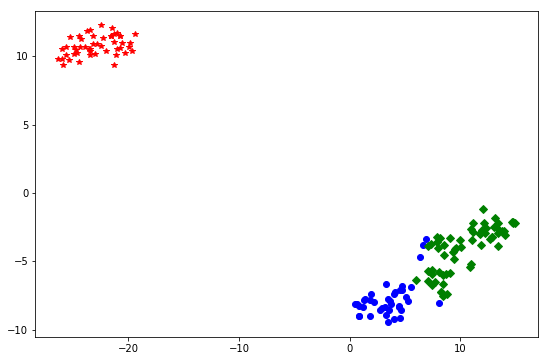

In [2]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

##使用TSNE进行数据降维,降成两维
tsne = TSNE(n_components=2,init='random', random_state=177).fit(iris_data)
df=pd.DataFrame(tsne.embedding_) ##将原始数据转换为DataFrame
df['labels'] = kmeans.labels_ ##将聚类结果存储进df数据表
##提取不同标签的数据
df1 = df[df['labels']==0]
df2 = df[df['labels']==1] 
df3 = df[df['labels']==2] 
## 绘制图形
fig = plt.figure(figsize=(9,6)) ##设定空白画布，并制定大小
##用不同的颜色表示不同数据
plt.plot(df1[0],df1[1],'bo',df2[0],df2[1],'r*', df3[0],df3[1],'gD')
plt.savefig('./scikit_learn/tmp/聚类结果.png') 
plt.show() ##显示图片

## 聚类模型的评价

- metrics模块提供的聚类模型评价指标

|方法名称|真实值|最佳值|sklearn函数|
|-|-|-|-|
|ARI评价法（兰德系数）|需要 |1.0|adjusted_rand_score|
|AMI评价法（互信息）|需要 |1.0|adjusted_mutual_info_score|
|V-measurce评分|需要| 1.0|completeness_score|
|FMI评价法|需要| 1.0|fowlkes_mallows_score|
|轮廓系数评价法|不需要|畸变程度最大|silhouette_score|
|Calinski-Harabasz指数评价法|不需要|相较最大|calinski_harabaz_score|

- 前4种方法均需要真实值的配合才能够评价聚类算法的优劣，
- 后两种则不需要真实值的配合。
- 但是前4种方法评价的效果更具有说服力，并且在实际运行的过程中，在有真实值做参考的情况下，聚类方法的评价可以等同于分类算法的评价。
- 除了轮廓系数评价法以外的评价方法，在不考虑业务场景的情况下都是得分越高，其效果越好，最高分值为1。
- 而轮廓系数评价法则需要判断不同类别数目情况下的轮廓系数的走势，寻找最优的聚类数目。
- 在需要真实值配合的聚类评价方法中选取FMI评价法判定建立的K-Means聚类模型，如

In [3]:
from sklearn.metrics import fowlkes_mallows_score

for i in range(2,7):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=123).fit(iris_data)
    score = fowlkes_mallows_score(iris_target,kmeans.labels_)
    print('iris数据聚%d类FMI评价分值为：%f' %(i,score))

iris数据聚2类FMI评价分值为：0.750473
iris数据聚3类FMI评价分值为：0.820808
iris数据聚4类FMI评价分值为：0.753970
iris数据聚5类FMI评价分值为：0.725483
iris数据聚6类FMI评价分值为：0.600691


- 结果显示，iris数据聚3类的时候FMI评价法分值最高，故聚类为3类的时候K-Means聚类模型最好。
- 使用轮廓系数评价法评估K-Means模型，然后做出轮廓系数走势图，根据图形判断聚类效果


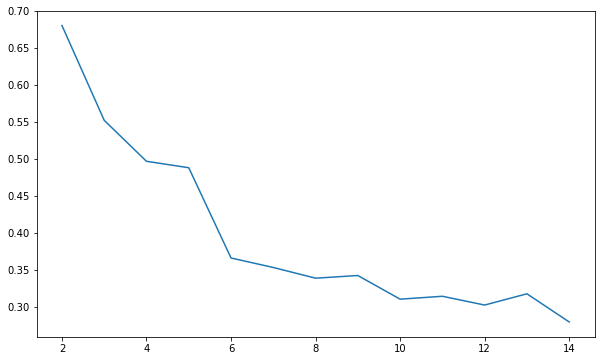

In [4]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouettteScore = []
for i in range(2,15):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=123).fit(iris_data)
    score = silhouette_score(iris_data,kmeans.labels_)
    silhouettteScore.append(score)
plt.figure(figsize=(10,6))
plt.plot(range(2,15),silhouettteScore,linewidth=1.5, linestyle="-")
plt.show()

- 从图形结果可以看出，聚类数目为2、3和5、6时平均畸变程度最大。
- 由于iris数据本身就是3种鸢尾花的花瓣、花萼长度和宽度的数据，侧面说明了聚类数目为3的效果最佳

- 使用Calinski-Harabasz指数评价K-Means聚类模型，基本判定方法和前4种需要真值作为依据的方法相同，分值越高，效果越好

In [5]:
from sklearn.metrics import calinski_harabaz_score

for i in range(2,7):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=123).fit(iris_data)
    score = calinski_harabaz_score(iris_data,kmeans.labels_)
    print('iris数据聚%d类calinski_harabaz指数为：%f'%(i,score))

iris数据聚2类calinski_harabaz指数为：513.303843
iris数据聚3类calinski_harabaz指数为：560.399924
iris数据聚4类calinski_harabaz指数为：529.120719
iris数据聚5类calinski_harabaz指数为：494.094382
iris数据聚6类calinski_harabaz指数为：474.753604


- 综上
    - 在真值作为参考下，几种方法均可以很好评估聚类模型
    - 没有真值参考，轮廓系数评价法和Calinski-Harabasz指数评价可以结合使用

## 任务

- Seeds数据集存放了不同品种小麦种子的区域、周长、压实度、籽粒长度、籽粒宽度、不对称系数、籽粒腹沟长度以及类别数据，共210条记录，7个特征，一个标签，标签分为3类
1. 构建K-Means模型
2. 评价构建的模型

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

seeds = pd.read_csv('./scikit_learn/data/seeds_dataset.txt',sep = '\t')
print('数据集形状为：', seeds.shape)
## 处理数据
seeds_data = seeds.iloc[:,:7].values
seeds_target = seeds.iloc[:,7].values
sees_names = seeds.columns[:7]
stdScale = StandardScaler().fit(seeds_data)
seeds_dataScale = stdScale.transform(seeds_data)
##构建并训练模型
kmeans = KMeans(n_clusters = 3,random_state=42).fit(seeds_data)
print('构建的KM-eans模型为：\n',kmeans)

数据集形状为： (210, 8)
构建的KM-eans模型为：
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)


In [7]:
from sklearn.metrics import calinski_harabaz_score
for i in range(2,7):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=12).fit(seeds_data)
    score = calinski_harabaz_score(seeds_data,kmeans.labels_)
    print('seeds数据聚%d类calinski_harabaz指数为：%f'%(i,score))


seeds数据聚2类calinski_harabaz指数为：351.179992
seeds数据聚3类calinski_harabaz指数为：375.804961
seeds数据聚4类calinski_harabaz指数为：327.835320
seeds数据聚5类calinski_harabaz指数为：310.331840
seeds数据聚6类calinski_harabaz指数为：302.473069


- 在聚类数目为3的时候，Calinski-Harabasz指数系数最大，表明时聚类模型效果最好，故Seeds数据集最优聚类数目为3类。结合原数据中的target，类别数目恰好为3类。

# 构建并评价分类模型

- 任务描述
    - 分类是指构造一个分类模型，输入样本的特征值，输出对应的类别，将每个样本映射到预先定义好的类别。分类模型建立在已有类标记的数据集上，属于有监督学习。在实际应用场景中，分类算法被用于行为分析、物品识别、图像检测等。
- 任务分析
    - 1）使用skiearn估计器构建支持向量机（SVM）模型。
    - 2）根据分类模型的评价指标评价支持向量机模型。


## 使用sklearn估计器构建分类模型


- 在数据分析领域，分类算法很多，其原理千差万别，有基于样本距离的最近邻算法，有基于特征信息熵的决策树，有基于bagging的随机森林，有基于boosting的梯度提升分类树，但其实现的过程相差不大，
![](https://i.loli.net/2018/08/09/5b6c4fc9897a5.jpg)
- sklearn中提供的分类算法非常多，分别存在于不同的模块中。

|模块名称|函数名称|算法名称|
|-|-|-|
|linear_model|LogisticRegression|逻辑斯蒂回归|
|svm|SVC|支持向量机|
|neighbors|KNeighborsClassifier|K最近邻分类|
|naive_bayes|GaussianNB|高斯朴素贝叶斯|
|tree|DecisionTreeCIassifier|分类决策树|
|ensemble|RandomForestClassifier|随机森林分类|
|ensemble|GradientBoostingClassifier|梯度提升分类树|

- 以breast_cancer数据为例，使用sklearn估计器构建支持向量机（SVM）模型，如

In [8]:
## 加载所需的函数,
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
cancer_data = cancer['data']
cancer_target = cancer['target']
cancer_names = cancer['feature_names']
## 将数据划分为训练集测试集
cancer_data_train,cancer_data_test, \
cancer_target_train,cancer_target_test = \
train_test_split(cancer_data,cancer_target,
      test_size = 0.2,random_state = 22)
## 数据标准化
stdScaler = StandardScaler().fit(cancer_data_train)
cancer_trainStd = stdScaler.transform(cancer_data_train)
cancer_testStd = stdScaler.transform(cancer_data_test)
## 建立SVM模型
svm = SVC().fit(cancer_trainStd,cancer_target_train)
print('建立的SVM模型为：\n',svm)


建立的SVM模型为：
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [9]:
## 预测训练集结果
cancer_target_pred = svm.predict(cancer_testStd)
print('预测前20个结果为：\n',cancer_target_pred[:20])

预测前20个结果为：
 [1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1]


- 分类结果的混淆矩阵与准确率

In [10]:
## 求出预测和真实一样的数目
true = np.sum(cancer_target_pred == cancer_target_test )
print('预测对的结果数目为：', true)
print('预测错的的结果数目为：', cancer_target_test.shape[0]-true)
print('预测结果准确率为：', true/cancer_target_test.shape[0])

预测对的结果数目为： 111
预测错的的结果数目为： 3
预测结果准确率为： 0.973684210526


## 评价分类模型

- 分类模型对测试集进行预测而得出的确率并不能很好地反映模型的性能，
- 为了有效判断一个预测模型的性能表现，要结合真实值计算出准确率、召回率、F1值和Cohen's Kappa系数等指标衡量

|方法名称|最佳值|sklearn函数|
|-|-|-|
|Precision（精确率）|1.0|metrics.precision_score|
|Recall（召回率）|1.0|metrics.recallsc_ore|
|Fl值|1.0|metrics.fl_score|
|Cohen、Kappa系数|1.0|metrics.cohen_kappa_score|
|ROC曲线|最靠近y轴|metrics.roc_curve|

- 前4种都是分值越高越好，其使用方法基本相同。

建立的支持向量机模型的Precision、Recall、Fl值和Cohen's Kappa系数评价指标

In [11]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,cohen_kappa_score

print('使用SVM预测breast_cancer数据的准确率为：', accuracy_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的精确率为：', precision_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的召回率为：', recall_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的F1值为：', f1_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的Cohen’s Kappa系数为：', cohen_kappa_score(cancer_target_test,cancer_target_pred))

使用SVM预测breast_cancer数据的准确率为： 0.973684210526
使用SVM预测breast_cancer数据的精确率为： 0.959459459459
使用SVM预测breast_cancer数据的召回率为： 1.0
使用SVM预测breast_cancer数据的F1值为： 0.979310344828
使用SVM预测breast_cancer数据的Cohen’s Kappa系数为： 0.943208236466


In [12]:
from sklearn.metrics import classification_report

print('使用SVM预测iris数据的分类报告为：','\n', classification_report(cancer_target_test, cancer_target_pred))

使用SVM预测iris数据的分类报告为： 
              precision    recall  f1-score   support

          0       1.00      0.93      0.96        43
          1       0.96      1.00      0.98        71

avg / total       0.97      0.97      0.97       114



- 绘制ROC曲线

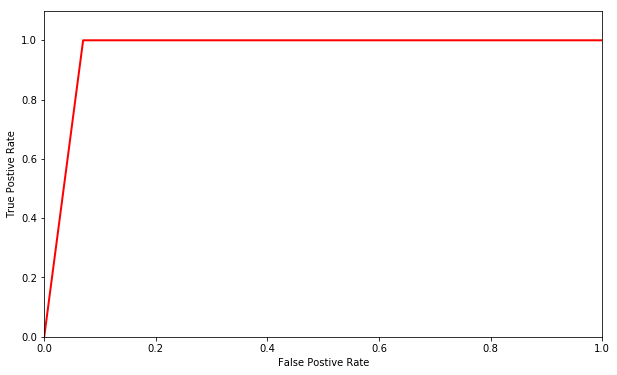

In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

## 求出ROC曲线的x轴和y轴
fpr, tpr, thresholds = roc_curve(cancer_target_test,cancer_target_pred)

plt.figure(figsize=(10,6))
plt.xlim(0,1) ##设定x轴的范围
plt.ylim(0.0,1.1) ## 设定y轴的范围
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='red')
plt.show()

- ROC曲线横纵坐标范围为[0,1]，通常情况下，ROC曲线与轴形成的面积越大，表示模型性能越好。
- 当ROC曲线为从（0,0）到（1,1）的直线时，表明了模型的计算结果基本都是随机得来的，在此情况卜，模型起到的作用几乎为零。
- 故在实际中，ROC曲线离（0,0）到（1,1）的直线越远，表示模型效果越好。
## 任务实现
- 常规的鲍鱼的年龄是通过显微镜查看切削、染色后的外壳上环的数量得到的，十分耗时
- 一些常规的物理量（如性别、长度、高度、壳体重量等）的测量十分容易获得，若能够使用这些物理量预测年龄，将节省大量时间。
- 使用sklearn构建鲍鱼年龄预测的步骤如下。
1. 构建SVM分类模型
2. 评价SVM分类模型

In [14]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

abalone = pd.read_csv('./scikit_learn/data/abalone.data',sep=',')
## 将数据和标签拆开
abalone_data = abalone.iloc[:,:8]
abalone_target = abalone.iloc[:,8]
## 连续型特征离散化
sex = pd.get_dummies(abalone_data['sex'])
abalone_data = pd.concat([abalone_data,sex],axis = 1 )
abalone_data.drop('sex',axis = 1,inplace = True)
## 划分训练集，测试集
abalone_train,abalone_test, abalone_target_train,abalone_target_test = train_test_split(abalone_data,abalone_target,
                                                                                        train_size = 0.8,random_state = 42) 
## 标准化
stdScaler = StandardScaler().fit(abalone_train)
abalone_std_train = stdScaler.transform(abalone_train)
abalone_std_test = stdScaler.transform(abalone_test)
## 建模
svm_abalone = SVC().fit(abalone_std_train,abalone_target_train)
print('建立的SVM模型为：','\n',svm_abalone)

D:\Program Files\Anaconda3\envs\Python_36\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


建立的SVM模型为： 
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [15]:
abalone_target_pred = svm_abalone.predict(abalone_std_test)
print('abalone数据集的SVM分类报告为：\n', classification_report(abalone_target_test,abalone_target_pred))


abalone数据集的SVM分类报告为：
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.45      0.69      0.55        13
          5       0.54      0.22      0.31        32
          6       0.40      0.33      0.36        48
          7       0.41      0.44      0.42        84
          8       0.37      0.36      0.37        99
          9       0.28      0.57      0.38       142
         10       0.24      0.33      0.28       139
         11       0.25      0.25      0.25        93
         12       0.00      0.00      0.00        51
         13       0.00      0.00      0.00        31
         14       0.00      0.00      0.00        26
         15       0.00      0.00      0.00        21
         16       0.00      0.00      0.00        13
         17       0.00      0.00      0.00         8
         18       0.00      0.00      0.00        12
         19       0.00      0.00      0.00         7
         20       0.00 

D:\Program Files\Anaconda3\envs\Python_36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 构建并评价回归模型

- 任务描述
    - 回归算法的实现过程与分类算法类似，原理相差不大。分类和回归的主要区别在于，
    - 分类算法的标签是离散的，但是回归算法的标签是连续的。
    - 回归算法在交通、物流、社交网络和金融领域都能发挥巨大作用。
- 任务分析
    - （1）使用估计器构建线性回归（Linear Regression）模型。
    - （2）根据回归模型评价指标评价线性回归模型。


## 使用sklearn估计器构建线性回归模型

![](https://i.loli.net/2018/08/09/5b6c57c56f04a.jpg)

- 在回归模型中，自变量与因变量具有相关关系，自变量的值是已知的，因变量是要预测的。
- 回归算法的实现步骤和分类算法基本相同，分为学习和预测两个步骤。
- 学习是通过训练样本数据来拟合回归方程的；
- 预测则是利用学习过程中拟合出的回归方程，将测试数据放入方程中求出预测值。
- 常用的回归模型

<table>
	<tr>
		<td>回归模型名称</td>
		<td>适用条件</td>
		<td>算法描述</td>
	</tr>
		<tr>
		<td>线性回归</td>
		<td>因变量与自变量是线性</td>
		<td>对一个或多个自变量和因变量之间的线性关系进行建模，可用最小二乘估计法求解模型系数</td>
	</tr>
		<tr>
		<td>非线性回归</td>
		<td>因变量与自变量之间不都是线性关系</td>
		<td>对一个或多个自变量和因变量之间的非线性关系进行建模。  
如果非线性关系可以通过简单的函数变换转化成线性关系，  
则可用线性回归的思想求解；如果不能转化，可用非线性最小二乘估计法求解</td>
	</tr>
		<tr>
		<td>Locistic回归</td>
		<td>因变量一般有1和0（是与否）两种取值</td>
		<td>是广义线性回归模型的特例，利用Logistic函数将因变量的取值范围控制在0、1,  
表示取值为1的概率</td>
	</tr>
		<tr>
		<td>岭回归</td>
		<td>参与建模的自变量之间具有多重共线性</td>
		<td>是一种改进最小二乘估计法的方法</td>
	</tr>
		<tr>
		<td>主成分回归</td>
		<td>参与建模的自变量之间具有多重共线性</td>
		<td>主成分回归是根据主成分分析的思想提出来的，是对最小二乘估计法的一种改进，  
它是参数估计的一种有偏估计。可以消除自变量之间的多重共线性</td>
	</tr>
</table>

- sklearn库内部的常用回归算法

|模块|函数名称|算法名称|
|-|-|-|
|linear_model|LinearRegression|线性回归|
|svm|SVR|支持向量回归|
|neighbors|KNeighborsRegressor|最近邻回归|
|tree|DecisionTreeRegressor|回归决策树|
|ensemble|RandomForestRegressor|随机森林回归|
|ensemble|GradientBoostingRegressor|梯度提升回归树|


- 以boston数据集为例，使用sklearn估计器构建线性回归模型

In [1]:
##加载所需函数
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

## 加载boston数据
boston = load_boston()
X = boston['data']
y = boston['target']
names = boston['feature_names']

## 将数据划分为训练集测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=125)

## 建立线性回归模型
clf = LinearRegression().fit(X_train,y_train)
print('建立的LinearRegression模型为：','\n',clf)


建立的LinearRegression模型为： 
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [2]:
## 预测训练集结果
y_pred = clf.predict(X_test)
print('预测前20个结果为：','\n',y_pred[:20])

预测前20个结果为： 
 [ 21.12953164  19.67578799  22.01735047  24.62046819  14.45164813
  23.32325459  16.6468677   14.9175848   33.58466804  17.48328609
  25.50385719  36.60215179  25.95309333  28.48503161  19.34928078
  20.16966217  25.9788081   18.25959831  16.52754056  17.08448854]


- 利用预测结果和真实结果画出折线图，能较为直观地看出线性回归模型效果.
- 折线图说明了除了部分预测值和原值相差较大外，绝大多数拟合效果良好，与实际偏差不大。

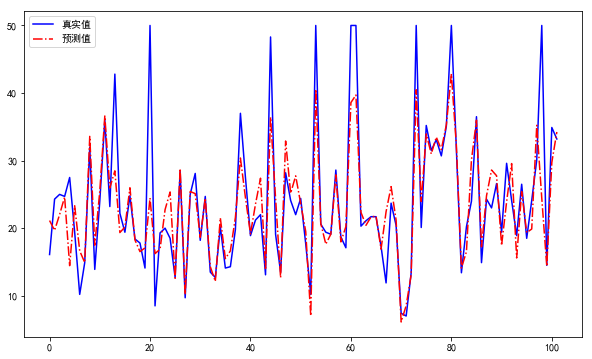

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = 'SimHei'
fig = plt.figure(figsize=(10,6)) ##设定空白画布，并制定大小
##用不同的颜色表示不同数据
plt.plot(range(y_test.shape[0]),y_test,color="blue", linewidth=1.5, linestyle="-")
plt.plot(range(y_test.shape[0]),y_pred,color="red", linewidth=1.5, linestyle="-.")
plt.legend(['真实值','预测值'])
plt.savefig('./scikit_learn/tmp/聚类结果.png') 
plt.show() ##显示图片

## 评价回归模型

- 回归模型的性能评价不同于分类模型，虽然都是对照真实值进行评价，
- 但由于回归模型的预测结果和真实值都是连续的，所以不能够求取Precision、Recall和Fl值等评价指标。
- 回归模型拥有一套独立的评价指标。
- 常用的回归模型评价指标

|方法|最优值|sklearn函数|
|-|-|-|
|平均绝对误差|0·0|metrics.meana_absolute_error|
|均方误差|0·0|metrics·mean_squared_error|
|中值绝对误差|0·0|metrics.median_absolute_error|
|可解释方差值|1·0|metrics.explained_variance_score|
|$R^2$值|1·0|metrics·r2_score|

- 平均绝对误差、均方误差 和 中值绝对误差的值 越靠近 0，模型性能越好。
- 可解释方差值 和 $R^2$值 越靠近 1，模型性能越好。

In [4]:
from sklearn.metrics import explained_variance_score,\
mean_absolute_error,\
mean_squared_error,\
median_absolute_error,r2_score

print('Boston数据线性回归模型的平均绝对误差为：', mean_absolute_error(y_test,y_pred))
print('Boston数据线性回归模型的均方误差为：', mean_squared_error(y_test,y_pred))
print('Boston数据线性回归模型的中值绝对误差为：', median_absolute_error(y_test,y_pred))
print('Boston数据线性回归模型的可解释方差值为：', explained_variance_score(y_test,y_pred))
print('Boston数据线性回归模型的R方值为：', r2_score(y_test,y_pred))

Boston数据线性回归模型的平均绝对误差为： 3.37764269736
Boston数据线性回归模型的均方误差为： 31.1505966769
Boston数据线性回归模型的中值绝对误差为： 1.77742131574
Boston数据线性回归模型的可解释方差值为： 0.710594962628
Boston数据线性回归模型的R方值为： 0.706895422578


可以看出，建立的线性回归模型拟合效果一般，还有较大的改进余地。

## 任务实现
- 房子的估值是一件相对烦琐的事情，使用加利福尼亚住房数据集，可以通过房子的8个外在条件来评估房子的平均价值。
- 使用skiearn估计器建立回归模型来评价房子的平均价值需要以下两步。
    1. 构建线性回归模型
    2. 评价构建的线性回归模型代码

In [5]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

house = pd.read_csv('./scikit_learn/data/cal_housing.data',sep=',')
house_data = house.iloc[:,:-1]
house_target = house.iloc[:,-1]
house_names = ['longitude','latitude',
               'housingMedianAge', 'totalRooms',
               'totalBedrooms','population', 
               'households', 'medianIncome']
house_train,house_test,house_target_train,house_target_test = train_test_split(house_data,house_target,
                                                                               test_size = 0.2, random_state = 42)
GBR_house = GradientBoostingRegressor().fit(house_train,house_target_train)

print('建立的梯度提升回归模型为：','\n',GBR_house)

建立的梯度提升回归模型为： 
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


In [6]:
house_target_pred = GBR_house.predict(house_test)

from sklearn.metrics import explained_variance_score,\
mean_absolute_error,\
mean_squared_error,\
median_absolute_error,r2_score

print('california_housing数据梯度提升回归树模型的平均绝对误差为：', mean_absolute_error(house_target_test,house_target_pred))
print('california_housing数据梯度提升回归树模型的均方误差为：', mean_squared_error(house_target_test,house_target_pred))
print('california_housing数据梯度提升回归树模型的中值绝对误差为：', median_absolute_error(house_target_test,house_target_pred))
print('california_housing数据梯度提升回归树模型的可解释方差值为：', explained_variance_score(house_target_test,
                                                                         house_target_pred))
print('california_housing数据梯度提升回归树模型的R方值为：', r2_score(house_target_test,house_target_pred))


california_housing数据梯度提升回归树模型的平均绝对误差为： 38057.4384557
california_housing数据梯度提升回归树模型的均方误差为： 3103620040.46
california_housing数据梯度提升回归树模型的中值绝对误差为： 26179.4784457
california_housing数据梯度提升回归树模型的可解释方差值为： 0.761865224872
california_housing数据梯度提升回归树模型的R方值为： 0.761817656838


- 本次构建的梯度提升回归树模型的平均绝对误差和均方误差相对合理，同时可解释方差值和$R^2$值较接近1，故本次构建的模型是一个较为有效的模型

## 小结

- 主要根据数据 分析应用分类，重点介绍了对应的数据分析建模方法及实现过程。
- 归纳起来，数据分析技术的基本任务主要体现在聚类、分类和回归3类。
- 同时，每一类又有对应的多种评估方法，能够评价所构建模型的性能优劣。
- 通过学习，读者基本能够掌握常用的模型构建与评价方法。

# 实训

## 实训1 使用sklearn处理wine和wine_quality数据集

1. 训练要点
    - （1）掌握sklearn转换器的用法。
    - （2）掌握训练集、测试集划分的方法。
    - （3）掌握使用sklearn进行PCA降维的方法。
2. 需求说明
    - wine数据集和wine_quality数据集是两份和酒有关的数据集。
    - wine数据集包含3种不同起源的葡萄酒的记录，共178条。
         - 其中，每个特征对应葡萄酒的每种化学成分，
         - 并且都属于连续型数据。
    - 通过化学分析可以推断葡萄酒的起源。
    - wine_quality数据集共有4898个观察值，
        - 11个输入特征和一个标签。
        - 其中，不同类的观察值数量不等，
        - 所有特征为连续型数据。
    - 通过酒的各类化学成分，预测该葡萄酒的评分。
3. 实现思路及步骤
    - （1）使用pandas库分别读取wine数据集和win-quality数据集。
    - （2）将wine数据集和wine-quality数据集的数据和标签拆分开。
    - （3丿将wine-quality数据集划分为训练集和测试集。
    - （4）标准化wine数据集和wine-quality数据集。
    - （5）对wine数据集和wine_quality数据集进行PCA降维。


## 实训2 构建基于wine数据集的K-Means聚类模型

1. 训练要点
    - （1）了解sklearn估计器的用法。
    - （2）掌握聚类模型的构建方法。
    - （3）掌握聚类模型的评价方法。
2. 需求说明
    - wine数据集的葡萄酒总共分为3种，通过将wine数据集的数据进行聚类，聚集为3个簇，能够实现葡萄酒的类别划分。
3. 实现思路及步骤
    - （1）根据实训1的wine数据集处理的结果，构建聚类数目为3的K-Means模型
    - （2）对比真实标签和聚类标签求取FMI
    - （3）在聚类数目为2~10类时，确定最优聚类数目。
    - （4）求取模型的轮廓系数，绘制轮廓系数折线图，确定最优聚类数目。
    - （5）求取Calinski-Harabasz指数，确定最优聚类数目。    

## 实训3 构建基于wine数据集的SVM分类模型

1. 训练要点
    - （1）掌握sklearn估计器的用法。
    - （2）掌握分类模型的构建方法。
    - （3）掌握分类模型的评价方法。
2. 需求说明
    - wine数据集中的葡萄酒类别为3种，将wine数据集划分为训练集和测试集，
    - 使用训练集训练SVM分类模型，
    - 并使用训练完成的模型预测测试集的葡萄酒类别归属。
3. 实现思路及步骤
    - （1）读取数集，区分标签和数据。
    - （2）将wine数据集划分为训练集和测试集。
    - （3）使用离差标准化方法标准化wine数据集。
    - （4）构建svM模型，并预测测试集结果。
    - （5）打印出分类报告，评价分类模型性能。

## 实训4  构建基于wine_quality数据集的回归模型

1. 训练要点
    - （1)熟练sklearn估计器的用法。
    - （2)掌握回归模型的构建方法。
    - （3)掌握回归模型的评价方法。
2. 需求说明
    - wine_quality数据集的葡萄酒评分在0~10之间，构建线性回归模型与梯度提升回归模型，
    - 训练wine_quality数据集的训练集数据，训练完成后预测测试集的葡萄酒评分。
    - 结合真实评分，评价构建的两个回归模型的好坏。
3. 实现思路及步骤
    - （1) 根据wine_quality数据集处理的结果，构建线性回归模型。
    - （2）根据wine_quality数据集处理的结果，构建梯度提升回归模型。
    - （3）结合真实评分和预测评分，计算均方误差、中值绝对误差、可解释方差值。
    - （4）根据得分，判定模型的性能优劣。